## Performing EDA and Data Preprocessing

In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 1st Dataset : 

In [2]:
#LOADING DATASET

df= pd.read_csv("true_car_listings.csv")

In [3]:
df.head(10)

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic
5,7989,2012,105246,Miami,FL,JH4CU2F83CC019895,Acura,TSXAutomatic
6,14490,2014,34032,Greatneck,NY,JH4CU2F84EC002686,Acura,TSXSpecial
7,13995,2013,32384,West Jordan,UT,JH4CU2F64DC006203,Acura,TSX5-Speed
8,10495,2013,57596,Waterbury,CT,19VDE2E50DE000234,Acura,ILX6-Speed
9,9995,2013,63887,El Paso,TX,19VDE1F50DE010450,Acura,ILX5-Speed


In [4]:
# Counting number of rows in every column
df.count()

Price      852122
Year       852122
Mileage    852122
City       852122
State      852122
Vin        852122
Make       852122
Model      852122
dtype: int64

## 2nd Dataset :

In [5]:
#LOADING DATASET

df2 =pd.read_csv("tc20171021.csv", on_bad_lines='skip')

In [6]:
df2.head()

,Id,Price,Year,Mileage,City,State,Vin,Make,Model
0,1,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,2,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,3,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,4,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,5,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


Before merging both the dataset first we need to remove the Id column from the 2nd dataset i.e. d2

In [7]:
df2.drop('Id',axis = 1 , inplace = True)

In [8]:
df2.head()   # No ID Column

,Price,Year,Mileage,City,State,Vin,Make,Model
0,16472,2015,18681,Jefferson City,MO,KL4CJBSBXFB267643,Buick,EncoreConvenience
1,15749,2015,27592,Highland,IN,KL4CJASB5FB245057,Buick,EncoreFWD
2,16998,2015,13650,Boone,NC,KL4CJCSB0FB264921,Buick,EncoreLeather
3,15777,2015,25195,New Orleans,LA,KL4CJASB4FB217542,Buick,EncoreFWD
4,16784,2015,22800,Las Vegas,NV,KL4CJBSB3FB166881,Buick,EncoreConvenience


In [9]:
df2.count()

Price      1216250
Year       1216250
Mileage    1216250
City       1216250
State      1216250
Vin        1216250
Make       1216250
Model      1216250
dtype: int64

Total of 1216250 number of rows

## Merging both the Datasets

In [10]:
DF = pd.concat([df, df2], ignore_index=True)

In [11]:
DF.head()

,Price,Year,Mileage,City,State,Vin,Make,Model
0,8995,2014,35725,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


In [12]:
DF.count()

Price      2068372
Year       2068372
Mileage    2068372
City       2068372
State      2068372
Vin        2068372
Make       2068372
Model      2068372
dtype: int64

Total of 852122 + 1216250 = 2068372 Number of Rows

In [13]:
# Checking for any Null or NaN values if any 
DF.isna().any()

Price      False
Year       False
Mileage    False
City       False
State      False
Vin        False
Make       False
Model      False
dtype: bool

Clearly we can see that there is no missing values in the Dataset

In [14]:
# Name of the Columns.
DF.columns

Index(['Price', 'Year', 'Mileage', 'City', 'State', 'Vin', 'Make', 'Model'], dtype='object')

## Numerical Features

In [15]:
numerical_features = [features for features in DF.columns if DF[features].dtype != 'O']
print("Number of Numerical Features are : " , len(numerical_features))

# visualize the numerical variables
DF[numerical_features].head()

Number of Numerical Features are :  3


,Price,Year,Mileage
0,8995,2014,35725
1,10888,2013,19606
2,8995,2013,48851
3,10999,2014,39922
4,14799,2016,22142


## Temporal Variables (eg: Date-time Variables)

In [16]:
# we need to check what many Temporal varibles we have
year_features = [features for features in numerical_features if 'Year' in features]
print("Number of Temporal Features are :" , len(year_features))

DF[year_features].head()

Number of Temporal Features are : 1


,Year
0,2014
1,2013
2,2013
3,2014
4,2016


In [17]:
type(year_features)

list

In [18]:
# Lets explore the contents of Years Feature
for features in year_features:
    print(features, DF[features].unique())

Year [2014 2013 2016 2012 2009 2015 2010 2011 2007 2006 2008 2004 2017 2005
 2003 2002 1999 2001 2000 1998 2018 1997]


In [19]:
Years = [2014,2013,2016 ,2012, 2009, 2015, 2010, 2011, 2007, 2006, 2008, 2004, 2017, 2005,
 2003, 2002, 1999, 2001, 2000, 1998, 2018, 1997]
Years.sort()

In [20]:
# In the Dataset Cars are being maufactured from year 1997 to 2018
Years

[1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014,
 2015,
 2016,
 2017,
 2018]

Text(0.5, 1.0, 'Year made Vs Price of a car')

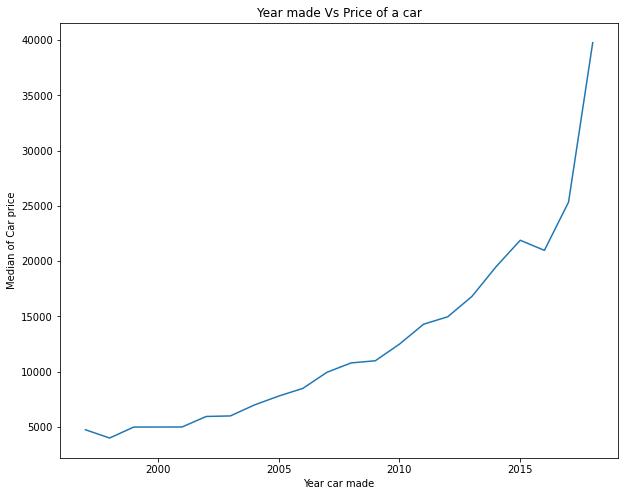

In [21]:
## Lets analyze the Temporal Datetime Variables
## We will check whether there is a relation between year the car is made and the Price of the car

DF.groupby('Year')['Price'].median().plot(figsize = (10,8))
plt.xlabel("Year car made")
plt.ylabel("Median of Car price")
plt.title("Year made Vs Price of a car")

We can cleary observe that "The New Car has more price as compared to the older Car. "

**Now let's find the relationship b/wn Mileage and the Price of the car**

Text(0.5, 1.0, 'Mileage VS Price')

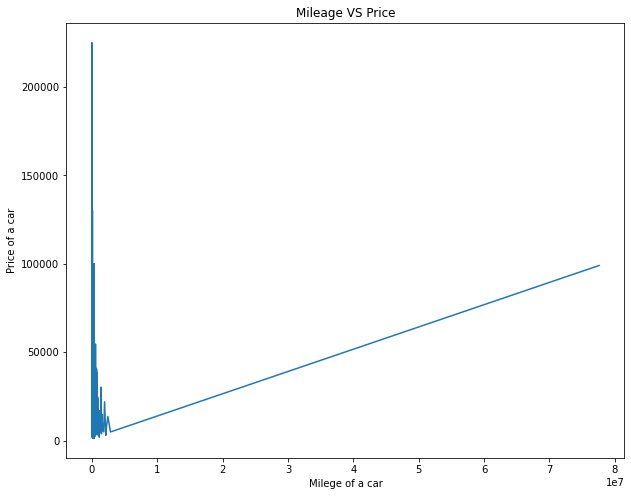

In [22]:
DF.groupby('Mileage')['Price'].median().plot(figsize = (10,8))
plt.xlabel('Milege of a car')
plt.ylabel('Price of a car')
plt.title("Mileage VS Price")

We Can clearly analyse that the more the mileage of a car,less the price of a car

In [23]:
DF.describe()

,Price,Year,Mileage
count,2.068372e+06,2.068372e+06,2.068372e+06
mean,2.117289e+04,2.013300e+03,5.274318e+04
std,1.334331e+04,3.430814e+00,6.836142e+04
min,1.500000e+03,1.997000e+03,5.000000e+00
25%,1.299500e+04,2.012000e+03,2.391000e+04
50%,1.800000e+04,2.014000e+03,4.042300e+04
75%,2.681700e+04,2.016000e+03,7.250400e+04
max,4.995000e+05,2.018000e+03,7.758776e+07


In [24]:
DF.loc[DF.duplicated(keep ='first')]

,Price,Year,Mileage,City,State,Vin,Make,Model
120948,16288,2015,54545,Pensacola,FL,2G1FB1E32F9284364,Chevrolet,CamaroCoupe
120949,19995,2016,17604,Beaumont,TX,2G11Z5SA9G9130915,Chevrolet,ImpalaLS
120950,5774,2008,125675,Fort Wayne,IN,2G1WT58K781214125,Chevrolet,Impala4dr
120951,20990,2017,17219,Marshfield,MO,2G1105S30H9120402,Chevrolet,ImpalaLT
120952,22573,2016,622,Colorado Springs,CO,1GCNCNEC9GZ402232,Chevrolet,Silverado
...,...,...,...,...,...,...,...,...
2068348,54995,2017,9631,Berwyn,PA,YV1A22MK2H1013239,Volvo,S90T6
2068351,54995,2017,10913,Berwyn,PA,YV1A22ML5H1004169,Volvo,S90T6
2068359,61990,2017,2201,Winston Salem,NC,YV1A22ML0H1006850,Volvo,S90T6
2068368,80895,2017,10,Corte Madera,CA,YV4BC0ZX0H1124188,Volvo,XC90T8


In [25]:
DF['Vin'].duplicated().sum()

840509

## Categorical Features

In [26]:
categorical_features = [features for features in DF.columns if DF[features].dtype == 'O']
print("The Categorical Features are :" , len(categorical_features))

categorical_features

The Categorical Features are : 5


['City', 'State', 'Vin', 'Make', 'Model']

In [27]:
DF[categorical_features].head()

,City,State,Vin,Make,Model
0,El Paso,TX,19VDE2E53EE000083,Acura,ILX6-Speed
1,Long Island City,NY,19VDE1F52DE012636,Acura,ILX5-Speed
2,El Paso,TX,19VDE2E52DE000025,Acura,ILX6-Speed
3,Windsor,CO,19VDE1F71EE003817,Acura,ILX5-Speed
4,Lindon,UT,19UDE2F32GA001284,Acura,ILXAutomatic


 We need to check how many numbers of unique features categorical values have (  CARDINALITY )


In [28]:
for features in categorical_features:
    print(" The feature is {}. Number of categories are {}".format(features,len(DF[features].unique())))

 The feature is City. Number of categories are 2599
 The feature is State. Number of categories are 59
 The feature is Vin. Number of categories are 1227863
 The feature is Make. Number of categories are 58
 The feature is Model. Number of categories are 3163


Here we can see that how many numbers of different values are in each category.

**Here we can see that the number of Vin Values are approximately equal to the Number of Rows.It shows it's different for each and every car in the dataset. Also as the Vin suggests it's vehicle identity number,which is obviously a unique value**

**So we can drop Vin Column**

In [29]:
DF.drop("Vin",axis = 1, inplace = True)

In [30]:
categorical_features = [features for features in DF.columns if DF[features].dtype == 'O']
print("The Categorical Features are :" , len(categorical_features))

categorical_features

The Categorical Features are : 4


['City', 'State', 'Make', 'Model']

## Handling the States Values
* Replacing the state values abbreviations with their actual values for better understanding..
* We can see that there are some similar values like AZ and Az,GA and ga , CA and Ca, etc so to make them as a one entity


In [31]:
DF['State'].replace([' TX', ' NY', ' CO', ' UT', ' FL', ' CT', ' ID', ' ND', ' CA',
       ' NJ', ' OH', ' VA', ' IN', ' AZ', ' OR', ' KS', ' NE', ' MA',
       ' MD', ' GA', ' MN', ' HI', ' LA', ' NM', ' IL', ' AL', ' PA',
       ' SC', ' NC', ' WA', ' WI', ' OK', ' KY', ' MS', ' MO', ' ME',
       ' AR', ' MI', ' NV', ' TN', ' Fl', ' NH', ' DE', ' WV', ' Az',
       ' VT', ' SD', ' IA', ' RI', ' ga', ' Oh', ' MT', ' DC', ' AK',
       ' Va', ' WY', ' Md', ' Ca', ' Ga'],['Texas','New York','Colorado','Utah','Florida','Connecticut','Idaho','North Dakota'
                                           ,'California','New Jersey','Ohio','Virginia','Indiana','Arizona','Oregon','Kansas'
                                           ,'Nebraska','Massachusetts','Maryland','Georgia','Minnesota','Hawaii','Louisiana'
                                           ,'New Mexico','Illinois','Alabama','Pennsylvania','South Carolina','North Carolina'
                                           ,'Washington','Wisconsin','Oklahoma','Kentucky','Mississippi','Missouri','Maine'
                                           ,'Arkansas','Michigan','Nevada','Tennessee','Florida','New Hampshire','Delaware'
                                           ,'West Virginia','Arizona','Vermont','South Dakota','Iowa','Rhode Island','Georgia'
                                           ,'Ohio','Montana','District of Columbia','Alaska','Virginia','Wyoming','Maryland'
                                           ,'California','Georgia'],inplace = True)

In [32]:
print('The Category is {} and unique values are: {}'.format(features, len(DF['State'].unique())))

The Category is Model and unique values are: 51


*We can see that the number of unique values are reduced to 51 from 59*

All values of Make or the Brands car belongs to

In [33]:
print('The Category is :',features, (DF['Make'].unique()))

The Category is : Model ['Acura' 'Alfa' 'AM' 'Aston' 'Audi' 'Bentley' 'BMW' 'Buick' 'Cadillac'
 'Chevrolet' 'Chrysler' 'Dodge' 'Ferrari' 'FIAT' 'Fisker' 'Ford'
 'Freightliner' 'Genesis' 'Geo' 'GMC' 'Honda' 'HUMMER' 'Hyundai'
 'INFINITI' 'Isuzu' 'Jaguar' 'Jeep' 'Kia' 'Lamborghini' 'Land' 'Lexus'
 'Lincoln' 'Lotus' 'Maserati' 'Maybach' 'Mazda' 'McLaren' 'Mercedes-Benz'
 'Mercury' 'MINI' 'Mitsubishi' 'Nissan' 'Oldsmobile' 'Plymouth' 'Pontiac'
 'Porsche' 'Ram' 'Rolls-Royce' 'Saab' 'Saturn' 'Scion' 'smart' 'Subaru'
 'Suzuki' 'Tesla' 'Toyota' 'Volkswagen' 'Volvo']


## Visualizing the relationship between the Categorical Features and the dependent Feature 'Price'

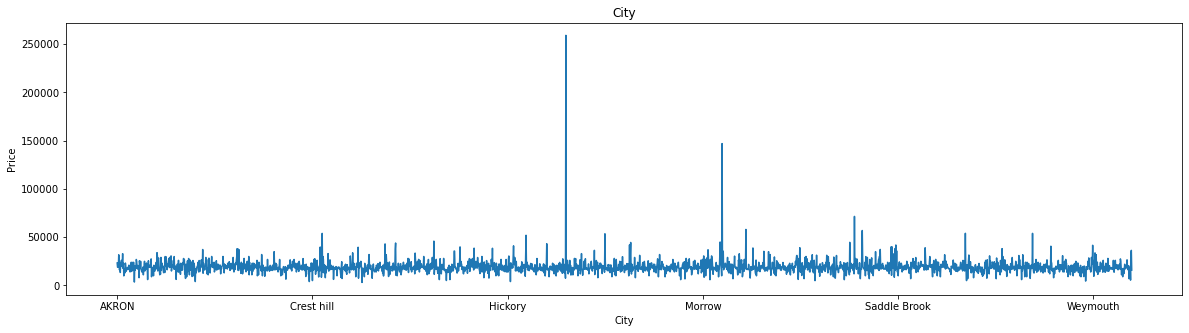

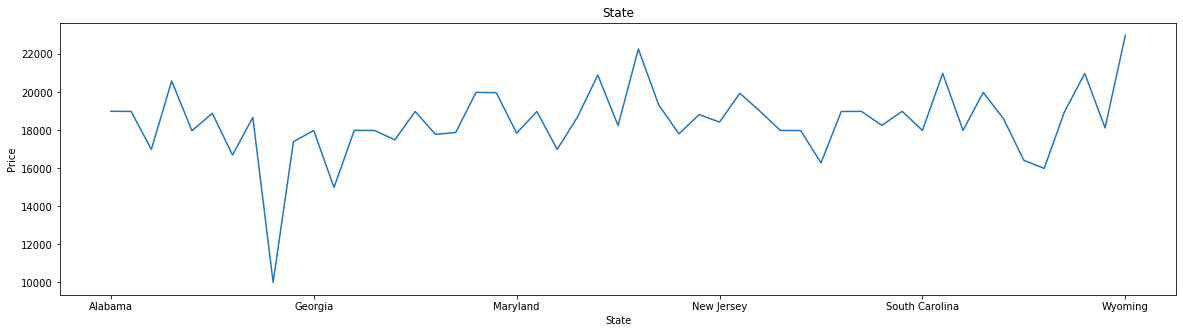

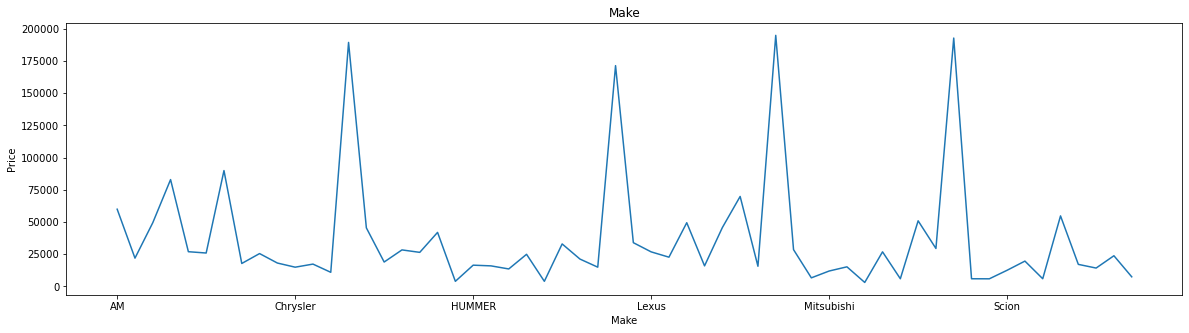

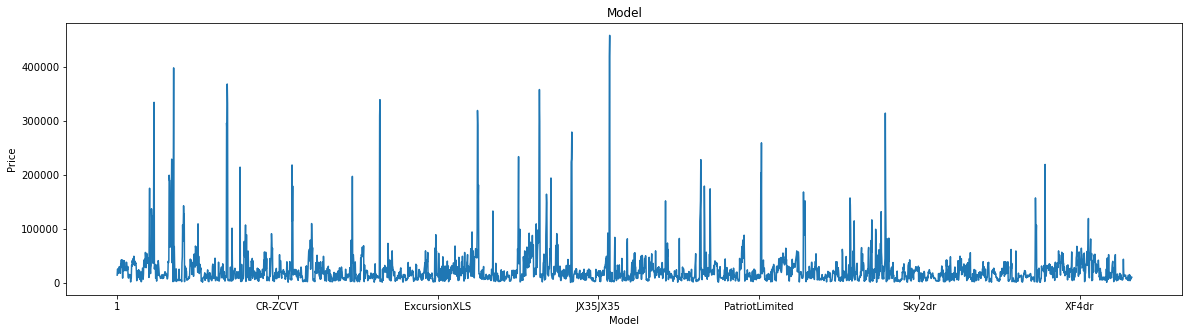

In [34]:
for features in categorical_features:
    data = DF.copy()
    data.groupby(features)['Price'].median().plot(figsize = (20,5))
    plt.xlabel(features)
    plt.ylabel('Price')
    plt.title(features)
    plt.show()

In [35]:
DF.head()

,Price,Year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,Texas,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,New York,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,Texas,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,Colorado,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,Utah,Acura,ILXAutomatic


## Dealing with Year Column




**Changing the 'Year' Column name to 'Mfg_year'**

In [36]:
DF.rename(columns = {'Year':'Mfg_year'}, inplace = True) 

In [37]:
DF.head()

,Price,Mfg_year,Mileage,City,State,Make,Model
0,8995,2014,35725,El Paso,Texas,Acura,ILX6-Speed
1,10888,2013,19606,Long Island City,New York,Acura,ILX5-Speed
2,8995,2013,48851,El Paso,Texas,Acura,ILX6-Speed
3,10999,2014,39922,Windsor,Colorado,Acura,ILX5-Speed
4,14799,2016,22142,Lindon,Utah,Acura,ILXAutomatic


**We can find how old our car (or the age of the car) just by subtracting the manufacturing year from the current year(2022).**

*Function for calculating the Age of car*

In [38]:
def Car_age (value):
    return(2022 - value)

In [39]:
DF['Car_age'] = DF['Mfg_year'].apply(Car_age)

**If suppose car is older than 15 years we call it as a 'old' otherwise as a 'New' into a new column 'Old_or_New'**


*Function for calculating if car is OLD or NEW based on the Age of the Car*

In [40]:
def Old_or_New (value):
    if value < 15:
        return('New')
    else:
        return('Old')

In [41]:
DF['Old_or_New'] = DF['Car_age'].apply(Old_or_New)

In [42]:
DF.head()

,Price,Mfg_year,Mileage,City,State,Make,Model,Car_age,Old_or_New
0,8995,2014,35725,El Paso,Texas,Acura,ILX6-Speed,8,New
1,10888,2013,19606,Long Island City,New York,Acura,ILX5-Speed,9,New
2,8995,2013,48851,El Paso,Texas,Acura,ILX6-Speed,9,New
3,10999,2014,39922,Windsor,Colorado,Acura,ILX5-Speed,8,New
4,14799,2016,22142,Lindon,Utah,Acura,ILXAutomatic,6,New


*Let's change the order of the columns of the DF so as to get the better insights*

In [43]:
DF.columns

Index(['Price', 'Mfg_year', 'Mileage', 'City', 'State', 'Make', 'Model',
       'Car_age', 'Old_or_New'],
      dtype='object')

In [44]:
columns = ['Price','Mfg_year','Car_age','Old_or_New','Mileage', 'City', 'State', 'Make', 'Model']

In [45]:
DF = DF.reindex(columns = columns)
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic


## Figuring out how old most of the cars are 

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


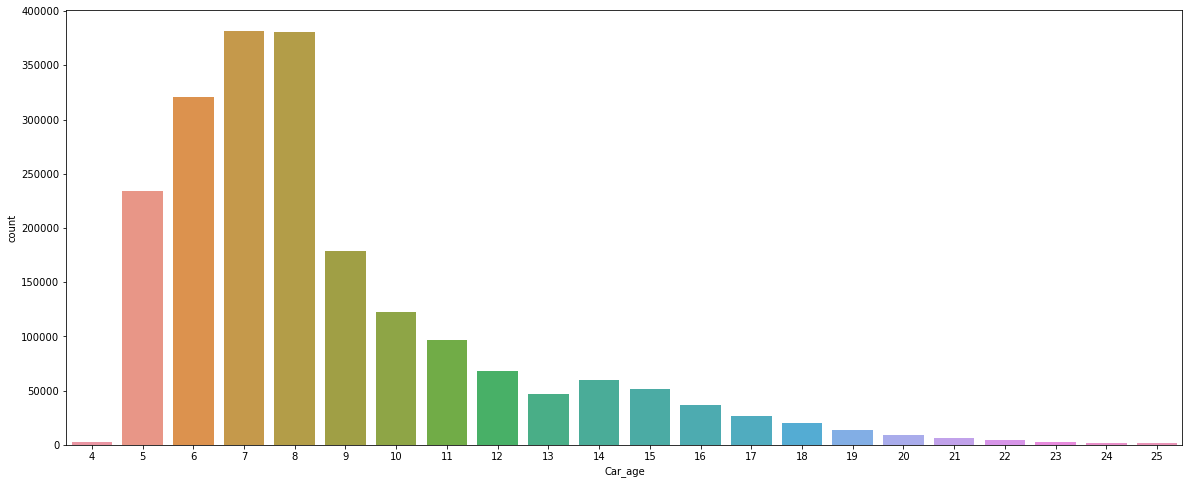

In [46]:
plt.figure(figsize=(20,8))
sns.countplot(DF['Car_age'])
plt.show()

* **Clearly we can see that mostly cars are 5-8 years old**

## Lets find out how the price of the car behaves with age of the car

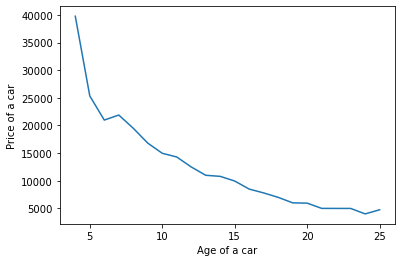

In [47]:
DF.groupby('Car_age')['Price'].median().plot()
plt.xlabel('Age of a car')
plt.ylabel('Price of a car')
plt.show()

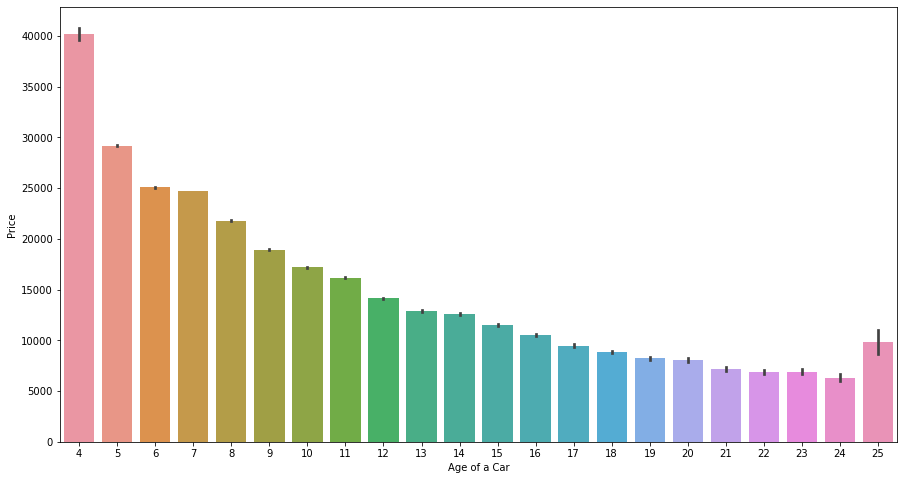

In [48]:
plt.figure(figsize=(15,8))
sns.barplot(x='Car_age',y="Price",data=DF)
plt.xlabel("Age of a Car")
plt.show()

What insights we can grasp from the above graph:
* After 4th year the price of the car drops tremendously.
* After 5th year the price drops gradually and then remains somewhat constant till 7th year of the car
* After 7th year the price drops slowly as the years pass
* How at the age of 25 years car price increases suddenly?

## How Many Old and New cars are there

In [49]:
DF.Old_or_New.value_counts()

New    1893155
Old     175217
Name: Old_or_New, dtype: int64

In [50]:
175217/1893155*100

9.25529077122581

So the ratio of new vs old cars in the market is 9:1

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


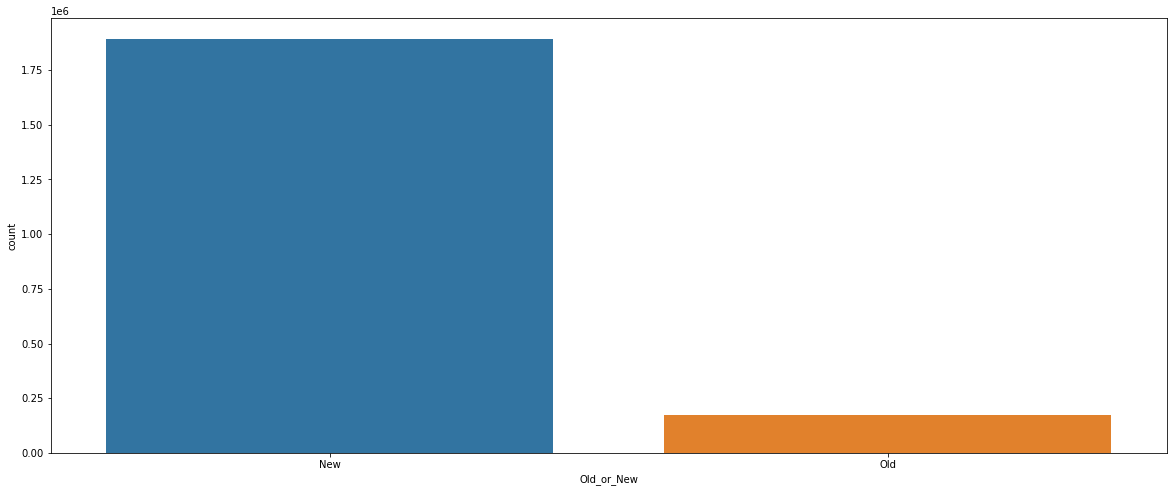

In [51]:
plt.figure(figsize=(20,8))
sns.countplot(DF['Old_or_New'])
plt.show()

## How the Prices of the cars are changed according to the year of manufacturing ?
* We'll find the relationship between both the columns

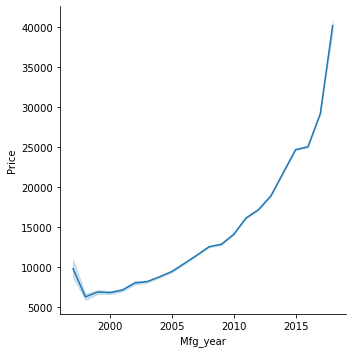

In [52]:
sns.relplot(data = DF , x ='Mfg_year',y='Price',kind = 'line')

We can clearly see that  as the Manufacturing years are increasing the price of the cars are also increasing

##  How the Price of a certain brand cars' changes according the year of manufacturing?

<Figure size 1080x576 with 0 Axes>

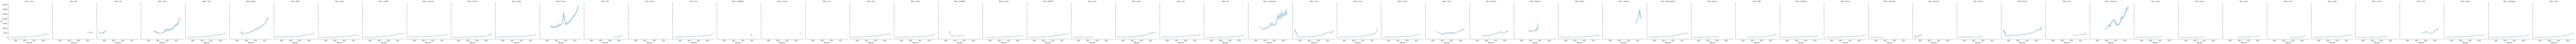

In [53]:
plt.figure(figsize=(15,8))
sns.relplot(data = DF , x ='Mfg_year',y='Price',kind = 'line',col = 'Make')
plt.show()

In [54]:
Price_Year = pd.DataFrame(DF.groupby(['Mfg_year','Make'])['Price'].median())

In [55]:
Price_Year.head(50)

Price
Mfg_year Make                  
1997     AM             62989.5
         Acura           3992.5
         Audi            4977.0
         BMW             6999.0
         Buick           2995.0
         Cadillac        3975.0
         Chevrolet       5394.0
         Chrysler        3000.0
         Dodge           4000.0
         Ford            4595.0
         GMC             3995.0
         Geo             3995.0
         Honda           3432.0
         INFINITI        2988.0
         Isuzu           1500.0
         Jaguar          5995.0
         Jeep            6971.5
         Kia             3376.0
         Land           77991.5
         Lexus           4975.0
         Lincoln         5950.0
         Mazda           4987.5
         Mercedes-Benz   5995.0
         Mercury         2992.0
         Mitsubishi      2497.0
         Nissan          3450.0
         Oldsmobile      2121.0
         Plymouth       33881.0
         Pontiac         4700.0
         Porsche        53800.0
         Saab            2950.0
         Saturn          2495.0
         Subaru          3999.0
         Suzuki          4399.5
         Toyota          3999.0
         Volkswagen      3995.0
         Volvo           2999.0
1998     AM             47499.5
         Acura           3932.5
         Audi            2999.0
         BMW             6995.0
         Buick           3490.0
         Cadillac        3997.5
         Chevrolet       9995.0
         Chrysler        3497.5
         Dodge           4995.0
         Ford            3997.5
         GMC             4995.0
         Honda           3310.0
         Hyundai         4096.0

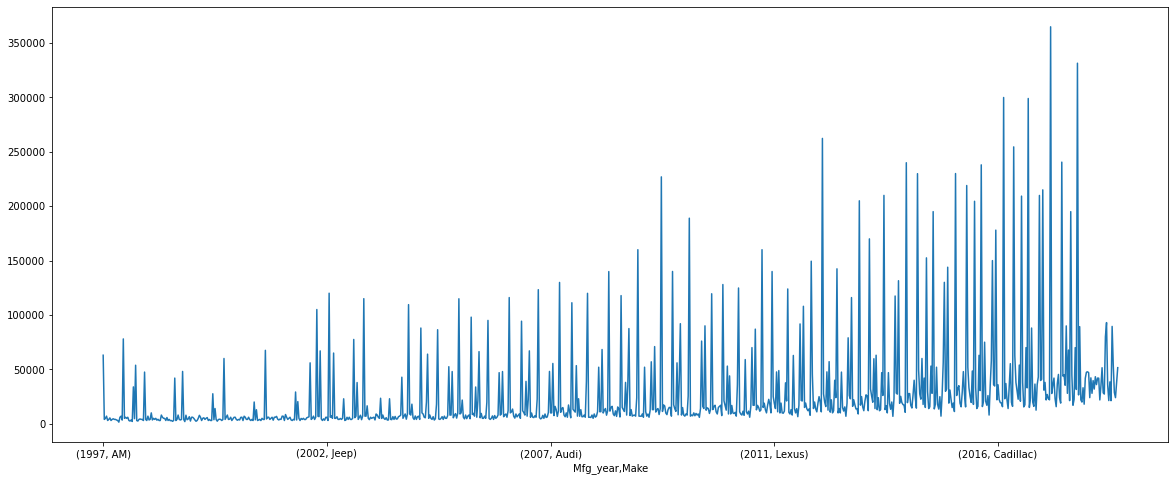

In [56]:
DF.groupby(['Mfg_year','Make'])['Price'].median().plot(figsize=(20,8))
plt.show()

## What are the Top 10 most expensive car brands?

In [57]:
type(DF.groupby('Make')['Price'].median().reset_index())

pandas.core.frame.DataFrame

In [58]:
Make_Price = pd.DataFrame(DF.groupby('Make')['Price'].median())

In [59]:
Make_Price = Make_Price.sort_values('Price',ascending = False )

In [60]:
Make_Price[:10]

,Price
Make,
McLaren,194987.0
Rolls-Royce,192888.0
Ferrari,189500.0
Lamborghini,171475.0
Bentley,89995.0
Aston,83000.0
Maybach,69900.0
AM,59995.0
Tesla,54800.0


## What is the distribution of the cars in the market?


* Let's see which car brand has the maximum number of cars in the market

In [61]:
DF.Make.value_counts()[:10].reset_index()

,index,Make
0,Ford,272431
1,Chevrolet,252694
2,Toyota,192881
3,Nissan,164960
4,Honda,127073
5,Jeep,100696
6,Hyundai,90484
7,Dodge,85056
8,GMC,72053
9,Kia,71470


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


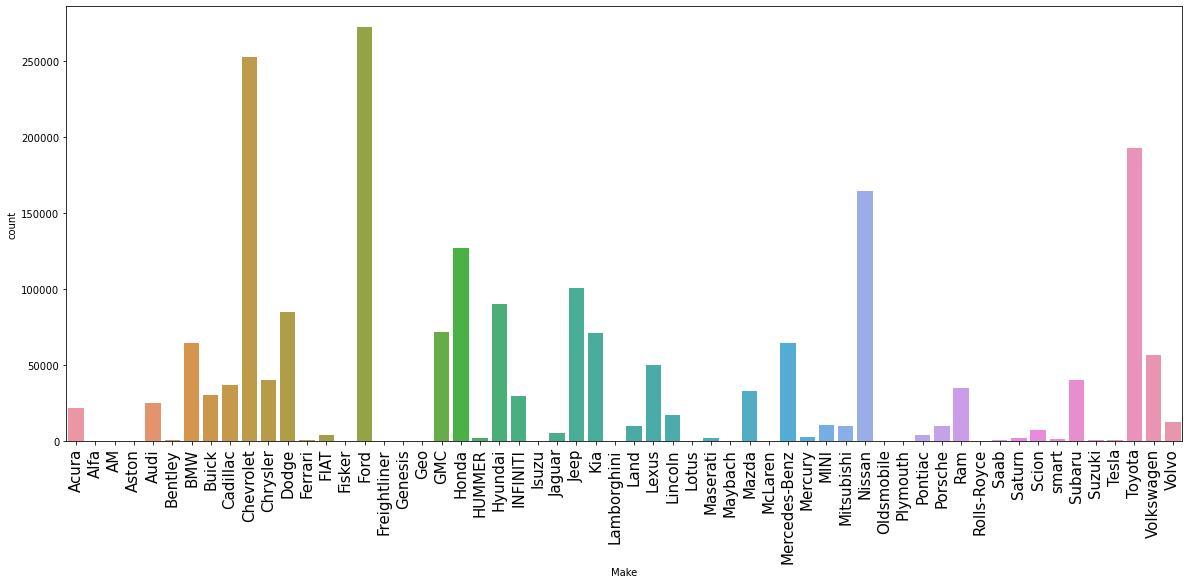

In [62]:
plt.figure(figsize=(20,8))
sns.countplot(DF['Make'])
plt.xticks(rotation ='vertical',size = 15)
plt.show()

The car brand which has the maximum number of cars in the market are :
* Ford
* Chevrolet
* Toyota
* Nissan

## Top Cities from were most of the cars are sold

In [63]:
DF.City.value_counts().reset_index()

,index,City
0,Houston,33018
1,San Antonio,19669
2,Louisville,15238
3,Jacksonville,13856
4,Austin,13155
...,...,...
2594,Armona,8
2595,Los Banos,8
2596,Port Jervis,8
2597,Royston,4


In [64]:
DF.City.value_counts().reset_index().head(50)

,index,City
0,Houston,33018
1,San Antonio,19669
2,Louisville,15238
3,Jacksonville,13856
4,Austin,13155
5,Miami,12912
6,Orlando,12890
7,Raleigh,12178
8,Colorado Springs,12111
9,Philadelphia,11444


In [65]:
DF.City.value_counts().reset_index().tail()

,index,City
2594,Armona,8
2595,Los Banos,8
2596,Port Jervis,8
2597,Royston,4
2598,Eminence,2


In [66]:
pd.DataFrame(DF.groupby(['State','City'])['Model'].count()).head(50)

Model
State   City                 
Alabama Albertville       130
        Alexander City     79
        Anniston          759
        Athens            299
        Atmore            108
        Auburn            781
        Bay Minette       524
        Bessemer          115
        Birmingham       3229
        Boaz              489
        Brewton           105
        Calera            176
        Childersburg       72
        Clanton           304
        Cullman          1275
        DAPHNE            162
        DOTHAN             82
        Dadeville          63
        Daphne           2343
        Decatur           864
        Dothan            888
        Elba              184
        Enterprise        588
        Florence          342
        Foley             169
        Fort Payne        656
        Gadsden           764
        Gardendale        115
        Hoover           1305
        Hueytown          309
        Huntsville       1850
        Huntville         473
        Jackson            47
        Jasper            706
        Loxley             77
        MOBILE             19
        Mobile           2343
        Montgomery       1538
        Muscle Shoals     432
        Oneonta            96
        Opelika           170
        Oxford            105
        Ozark             555
        Pelham           2251
        Phenix City        75
        Prattville        723
        Rainbow City      400
        Scottsboro        555
        Selma             157
        Sylacauga          91

In [67]:
pd.DataFrame(DF.groupby(['City'])['Model'].count()).head(50)

,Model
City,
AKRON,21
ALEXANDRIA,169
AURORA,138
AUSTIN,944
AVON,12
Abbeville,201
Aberdeen,331
Abilene,2087
Abington,760


In [68]:
DF['Car_Driven_Per_Year'] = DF['Mileage'] / DF['Car_age']

In [69]:
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model,Car_Driven_Per_Year
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed,4465.625000
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed,2178.444444
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed,5427.888889
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed,4990.250000
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic,3690.333333


## Dividing the Car_Driven_Per_Year into a new column Car_Usage_level 

* IF Car driven per year is > 5000 miles then its a Highly Driven car
* IF Car driven per year is greater 1000 and less than 5000 miles than car is Moderately driven
* IF Car driven per year is less than 1000 than car is less driven

In [70]:
def Car_Usage_level(value):
    if value>=5000:
        return('Highly Driven')
    elif 1000<=value<5000:
        return('Moderately Driven')
    else:
        return('Less Driven')

In [71]:
DF['Car_Usage_level'] = DF['Car_Driven_Per_Year'].apply(Car_Usage_level)

In [72]:
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model,Car_Driven_Per_Year,Car_Usage_level
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed,4465.625000,Moderately Driven
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed,2178.444444,Moderately Driven
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed,5427.888889,Highly Driven
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed,4990.250000,Moderately Driven
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic,3690.333333,Moderately Driven


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


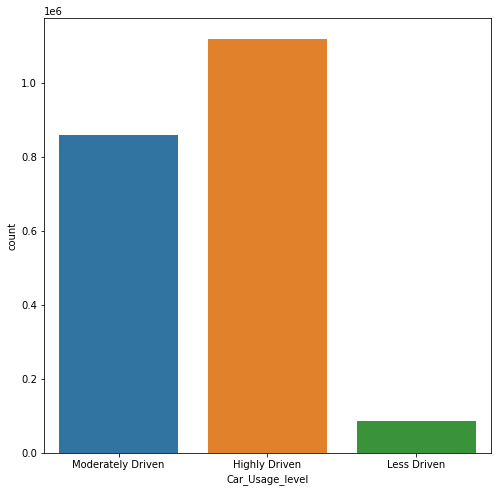

In [73]:
plt.figure(figsize=(8,8))
sns.countplot(DF['Car_Usage_level'])
plt.show()

## Relation between Price and Car usage Level ?

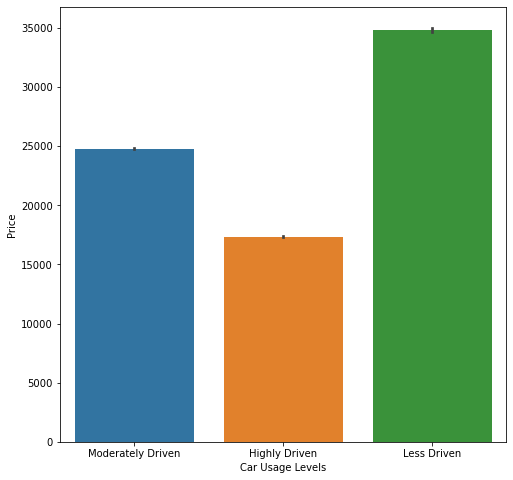

In [74]:
plt.figure(figsize=(8,8))
sns.barplot(x='Car_Usage_level',y="Price",data=DF)
plt.xlabel("Car Usage Levels")
plt.show()

We can see that 'Less Driven' cars has 'Maximum Price' followed by 'Moderately Driven' and 'Highly Driven cars'

## How the Price will change on the basis of Age of the car and Car Usage Levels

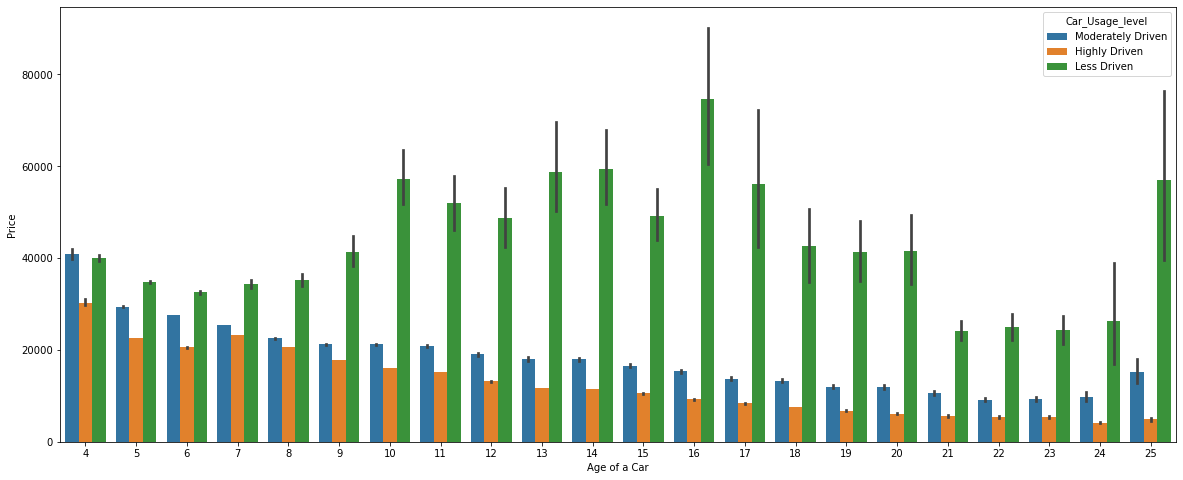

In [75]:
plt.figure(figsize=(20,8))
sns.barplot(x='Car_age',y="Price",data=DF,hue = "Car_Usage_level")
plt.xlabel("Age of a Car")
plt.show()

* No matter what is the age of the car,the less driven cars will have still have a minimum of 30000 USD  

## Which states has the more numbers of cars

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


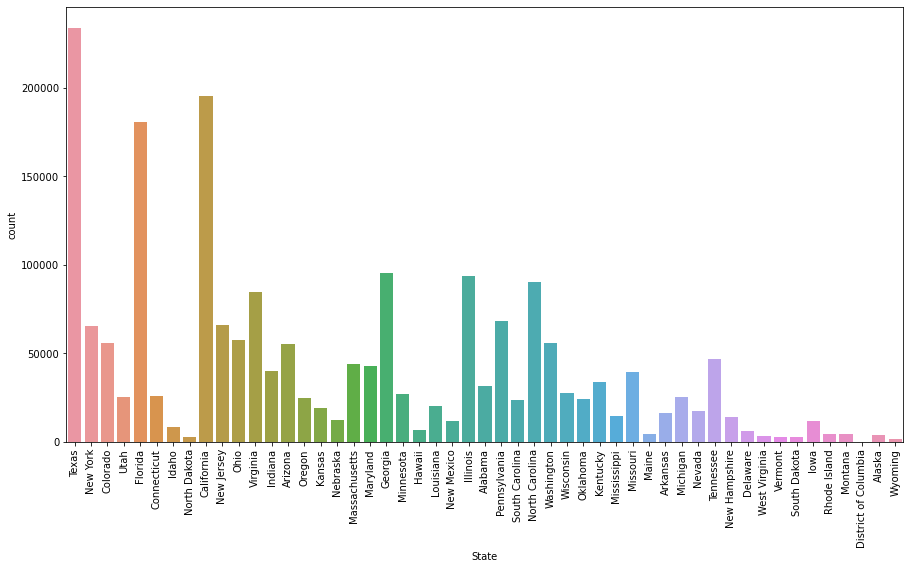

In [76]:
plt.figure(figsize=(15,8))
sns.countplot(DF['State'])
plt.xticks(rotation = 'vertical',size = 10)
plt.show()

## Determinig which States has more number of Cars
### Making a new column 'State Importance' based on States 

In [77]:
State_Dict = DF['State'].value_counts()
DF['Encoded_State'] = DF['State'].map(State_Dict)


In [78]:
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model,Car_Driven_Per_Year,Car_Usage_level,Encoded_State
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed,4465.625000,Moderately Driven,233989
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed,2178.444444,Moderately Driven,65661
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed,5427.888889,Highly Driven,233989
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed,4990.250000,Moderately Driven,55725
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic,3690.333333,Moderately Driven,25478


The State Column is divided as per the following condition
* If any unique State has occured more than 1,00,000 times it is considered as highly important
* If any unique State has occured b/wn 50,000 to 1,00,000 times it is considered as moderately important 
* If any unique city has occured less than 50,000 times it is considered as less important

In [79]:
def State_level(value):
    if value>=100000:
        return('High')
    elif 50000<=value<100000:
        return('Moderate')
    else:
        return('Less')

In [80]:
DF['State_Importance'] = DF['Encoded_State'].apply(State_level)

In [81]:
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model,Car_Driven_Per_Year,Car_Usage_level,Encoded_State,State_Importance
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed,4465.625000,Moderately Driven,233989,High
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed,2178.444444,Moderately Driven,65661,Moderate
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed,5427.888889,Highly Driven,233989,High
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed,4990.250000,Moderately Driven,55725,Moderate
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic,3690.333333,Moderately Driven,25478,Less


## How Our dataset is divided based on State_Importance

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


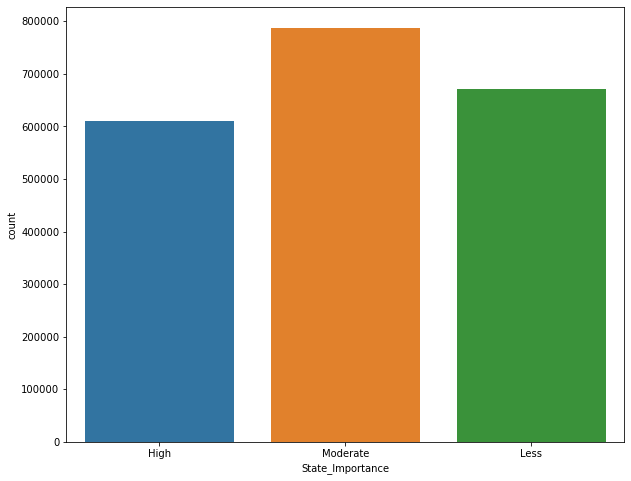

In [82]:
plt.figure(figsize=(10,8))
sns.countplot(DF['State_Importance'])

plt.show()

Insights from the above graph
* Maximum number of States are of Moderate Importance followed by Less and High importance


## Division of Price based on State Importance

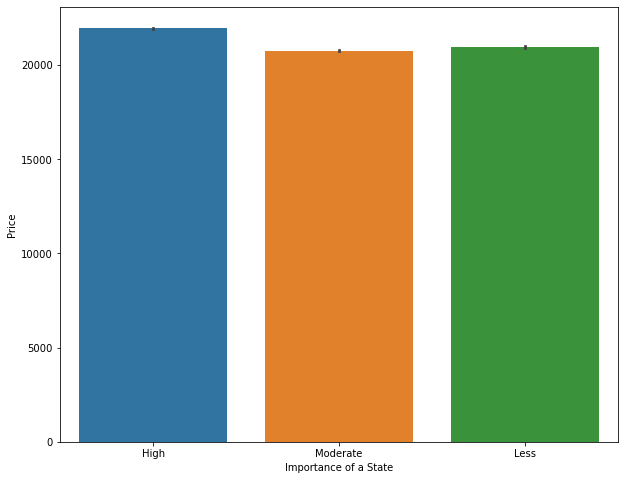

In [83]:
plt.figure(figsize=(10,8))
sns.barplot(x='State_Importance',y="Price",data=DF)
plt.xlabel("Importance of a State")
plt.show()

* Prices from the states with high importance are maximum , whereas the difference b/wn Moderate and Highly important states has no difference

## Determinig which City has more number of Cars
### Making a new column 'City Importance' based on State

**Using Frequency encoding method so as to get the new column based on the values from City column**

In [84]:
City_Dict = DF['City'].value_counts()
DF['Encoded_City'] = DF['City'].map(City_Dict)

In [85]:
DF['Encoded_City'].head()

0    7413
1    3791
2    7413
3     989
4    1173
Name: Encoded_City, dtype: int64

In [86]:
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model,Car_Driven_Per_Year,Car_Usage_level,Encoded_State,State_Importance,Encoded_City
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed,4465.625000,Moderately Driven,233989,High,7413
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed,2178.444444,Moderately Driven,65661,Moderate,3791
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed,5427.888889,Highly Driven,233989,High,7413
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed,4990.250000,Moderately Driven,55725,Moderate,989
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic,3690.333333,Moderately Driven,25478,Less,1173


In [87]:
DF['City'].value_counts().head()

Houston         33018
San Antonio     19669
Louisville      15238
Jacksonville    13856
Austin          13155
Name: City, dtype: int64

In [88]:
pd.DataFrame(DF['Encoded_City']>10000).sum()

Encoded_City    198607
dtype: int64

*using Function and .apply method to divide the city column*

The City Column is divided as per the following condition
* If any unique city has occured more than 10,000 times it is considered as highly important
* If any unique city has occured b/wn 1,000 to 10,000 times it is considered as moderately important 
* If any unique city has occured less than 1,000 times it is considered as less important

In [89]:
def City_level(value):
    if value>=10000:
        return('High')
    elif 1000<=value<10000:
        return('Moderate')
    else:
        return('Less')

In [90]:
DF['City_Importance'] = DF['Encoded_City'].apply(City_level)

In [91]:
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model,Car_Driven_Per_Year,Car_Usage_level,Encoded_State,State_Importance,Encoded_City,City_Importance
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed,4465.625000,Moderately Driven,233989,High,7413,Moderate
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed,2178.444444,Moderately Driven,65661,Moderate,3791,Moderate
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed,5427.888889,Highly Driven,233989,High,7413,Moderate
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed,4990.250000,Moderately Driven,55725,Moderate,989,Less
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic,3690.333333,Moderately Driven,25478,Less,1173,Moderate


## How Our dataset is divided based on State_Importance

C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


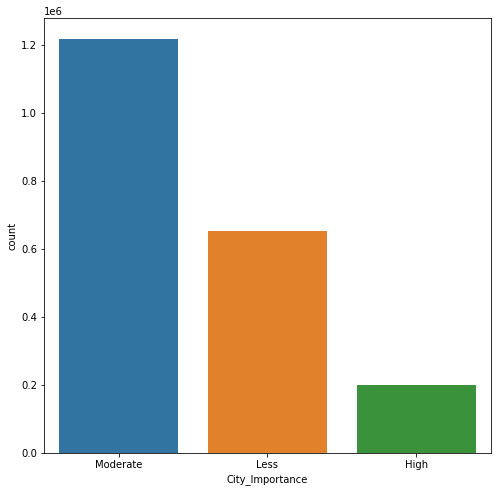

In [92]:
plt.figure(figsize=(8,8))
sns.countplot(DF['City_Importance'])
plt.show()

Insights from the above graph

* Maximum number of Cities are of Moderate Importance followed by Less and High importance.
* Maximum nuymber of cars are from  Moderate Importance followed by Less and High important cities


## Division of Price based on State Importance

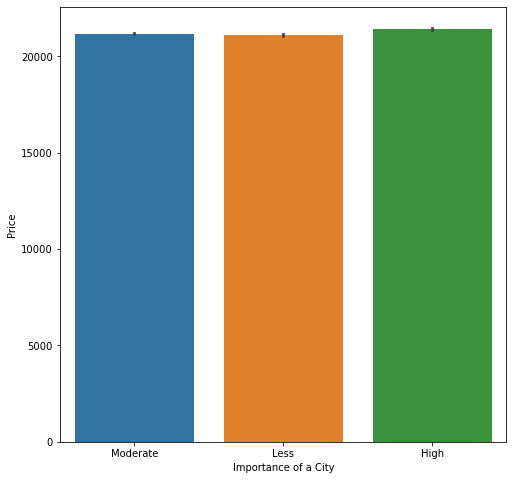

In [93]:
plt.figure(figsize=(8,8))
sns.barplot(x='City_Importance',y="Price",data=DF)
plt.xlabel("Importance of a City")
plt.show()

Car Price from the High, Moderate and Less important Cities has no difference or less difference

Let's Drop the Encoded_city and Encoded_State columns

In [94]:
DF = DF.drop(['Encoded_State','Encoded_City'], axis = 1)

In [95]:
DF.head()

,Price,Mfg_year,Car_age,Old_or_New,Mileage,City,State,Make,Model,Car_Driven_Per_Year,Car_Usage_level,State_Importance,City_Importance
0,8995,2014,8,New,35725,El Paso,Texas,Acura,ILX6-Speed,4465.625000,Moderately Driven,High,Moderate
1,10888,2013,9,New,19606,Long Island City,New York,Acura,ILX5-Speed,2178.444444,Moderately Driven,Moderate,Moderate
2,8995,2013,9,New,48851,El Paso,Texas,Acura,ILX6-Speed,5427.888889,Highly Driven,High,Moderate
3,10999,2014,8,New,39922,Windsor,Colorado,Acura,ILX5-Speed,4990.250000,Moderately Driven,Moderate,Less
4,14799,2016,6,New,22142,Lindon,Utah,Acura,ILXAutomatic,3690.333333,Moderately Driven,Less,Moderate


## Handling the Categorical values

***Count / Frequency Encoding***

Description: Replace each category with its frequency/number of time that category occurred in that column.

In [96]:
# How to count the frequency of values in a categorical feature
DF.State.value_counts()
    

Texas                   233989
California              195127
Florida                 180668
Georgia                  95264
Illinois                 93474
North Carolina           90114
Virginia                 84420
Pennsylvania             68396
New Jersey               66068
New York                 65661
Ohio                     57292
Washington               56044
Colorado                 55725
Arizona                  55237
Tennessee                46780
Massachusetts            44006
Maryland                 43093
Indiana                  39780
Missouri                 39303
Kentucky                 33502
Alabama                  31786
Wisconsin                27431
Minnesota                26764
Connecticut              25704
Utah                     25478
Michigan                 25427
Oregon                   24964
Oklahoma                 24311
South Carolina           23891
Louisiana                19991
Kansas                   18868
Nevada                   17171
Arkansas

In [97]:
DF.Make.value_counts()

Ford             272431
Chevrolet        252694
Toyota           192881
Nissan           164960
Honda            127073
Jeep             100696
Hyundai           90484
Dodge             85056
GMC               72053
Kia               71470
BMW               64830
Mercedes-Benz     64454
Volkswagen        56487
Lexus             50471
Chrysler          40205
Subaru            40186
Cadillac          36958
Ram               35053
Mazda             33222
Buick             30648
INFINITI          30010
Audi              25236
Acura             22098
Lincoln           17189
Volvo             12443
MINI              10599
Mitsubishi        10013
Land               9940
Porsche            9891
Scion              7432
Jaguar             5314
FIAT               4395
Pontiac            4365
Mercury            2670
Maserati           2426
Saturn             2407
HUMMER             2282
smart              1695
Suzuki              818
Ferrari             765
Bentley             734
Saab            

Since this method is not able to handle the same number of categories i.e provide the same values to both categories.

So we will not use this method

##  Mean Encoding
Description: Simillar to target/guided encoding only difference is here we replace category with the mean value with respect to target column.

Let's implement it with State and Price target column.

In [98]:
Encoded_Mean_Dict = DF.groupby(['State'])['Price'].mean().to_dict()

DF['State_Encoded'] = DF['State'].map(Encoded_Mean_Dict)

In [99]:
DF[['State','State_Encoded']].head()

,State,State_Encoded
0,Texas,23354.357658
1,New York,22153.607469
2,Texas,23354.357658
3,Colorado,21050.716465
4,Utah,21257.863098


Now Since the Categorical Column has been changed into the Numerical value we can drop the original Column

In [100]:
DF = DF.drop('State', axis = 1)

***Similarly we can replace every Categorical Columns present in our Dataset with its Mean Encoded Column***

Let's implement it with Make and Price target column.

In [101]:
Encoded_Mean_Dict = DF.groupby(['Make'])['Price'].mean().to_dict()
DF['Make_Encoded'] = DF['Make'].map(Encoded_Mean_Dict)
DF = DF.drop('Make', axis = 1)

Let's implement it with Model and Price target column.

In [102]:
Encoded_Mean_Dict = DF.groupby(['Model'])['Price'].mean().to_dict()
DF['Model_Encoded'] = DF['Model'].map(Encoded_Mean_Dict)
DF = DF.drop('Model', axis = 1)

Let's implement it with City and Price target column.

In [103]:
Encoded_Mean_Dict = DF.groupby(['City'])['Price'].mean().to_dict()
DF['City_Encoded'] = DF['City'].map(Encoded_Mean_Dict)
DF = DF.drop('City', axis = 1)

In [104]:
Encoded_Mean_Dict = DF.groupby(['State_Importance'])['Price'].mean().to_dict()
DF['State_Importance_Encoded'] = DF['State_Importance'].map(Encoded_Mean_Dict)
DF = DF.drop('State_Importance', axis = 1)

In [105]:
Encoded_Mean_Dict = DF.groupby(['City_Importance'])['Price'].mean().to_dict()
DF['City_Importance_Encoded'] = DF['City_Importance'].map(Encoded_Mean_Dict)
DF = DF.drop('City_Importance', axis = 1)

In [106]:
Encoded_Mean_Dict = DF.groupby(['Old_or_New'])['Price'].mean().to_dict()
DF['Old_or_New_Encoded'] = DF['Old_or_New'].map(Encoded_Mean_Dict)
DF = DF.drop('Old_or_New', axis = 1)

In [107]:
Encoded_Mean_Dict = DF.groupby(['Car_Usage_level'])['Price'].mean().to_dict()
DF['Car_Usage_level_Encoded'] = DF['Car_Usage_level'].map(Encoded_Mean_Dict)
DF = DF.drop('Car_Usage_level', axis = 1)

## Dataset Now 

In [108]:
DF.head() 

,Price,Mfg_year,Car_age,Mileage,Car_Driven_Per_Year,State_Encoded,Make_Encoded,Model_Encoded,City_Encoded,State_Importance_Encoded,City_Importance_Encoded,Old_or_New_Encoded,Car_Usage_level_Encoded
0,8995,2014,8,35725,4465.625000,23354.357658,23196.60648,16240.052632,21587.899501,21950.834799,21168.330951,22225.187075,24777.701964
1,10888,2013,9,19606,2178.444444,22153.607469,23196.60648,17214.413636,21153.936692,20753.471160,21168.330951,22225.187075,24777.701964
2,8995,2013,9,48851,5427.888889,23354.357658,23196.60648,16240.052632,21587.899501,21950.834799,21168.330951,22225.187075,17338.788811
3,10999,2014,8,39922,4990.250000,21050.716465,23196.60648,17214.413636,22082.700708,20753.471160,21104.254550,22225.187075,24777.701964
4,14799,2016,6,22142,3690.333333,21257.863098,23196.60648,22464.898396,19165.201194,20958.256610,21168.330951,22225.187075,24777.701964


## Distribution of the Dataset (Skewed or Not)

Now Since we have converted all the columns into numerical values we shall plot them and see their distribution

In [109]:
from scipy.stats import skew

Price
5.113890036000483


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


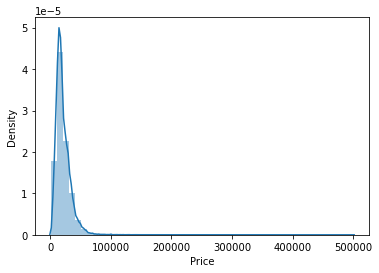

Mfg_year
-1.5261375739670822


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


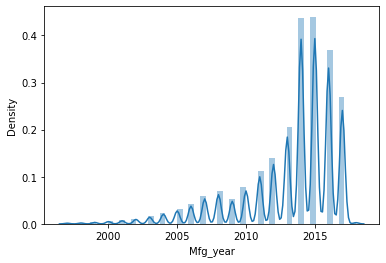

Car_age
1.5261375739670568


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


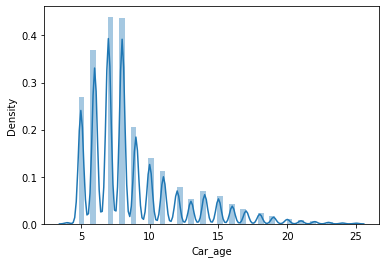

Mileage
706.051519104009


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


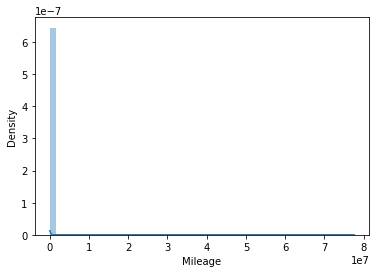

Car_Driven_Per_Year
1279.036825111561


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


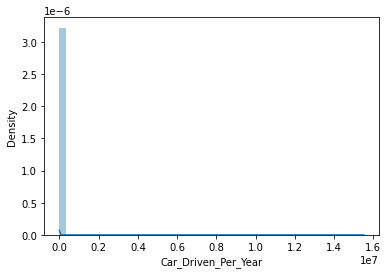

State_Encoded
-0.15540901964151357


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


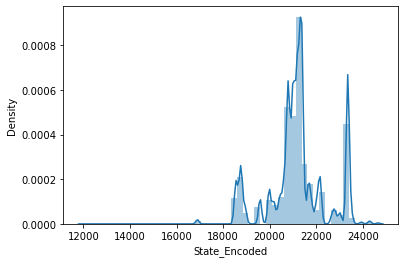

Make_Encoded
10.327684704272107


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


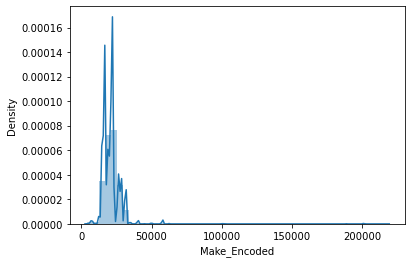

Model_Encoded
6.180693139717969


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


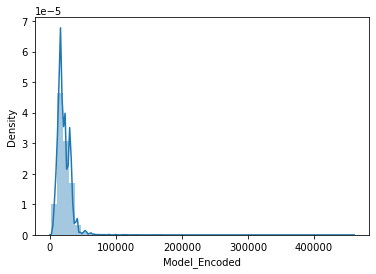

City_Encoded
7.2338405252168565


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


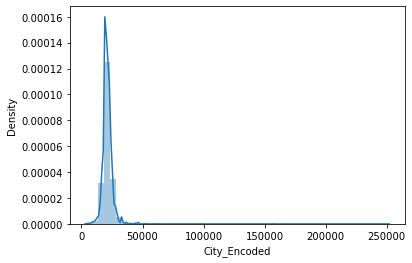

State_Importance_Encoded
0.8091550730331747


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


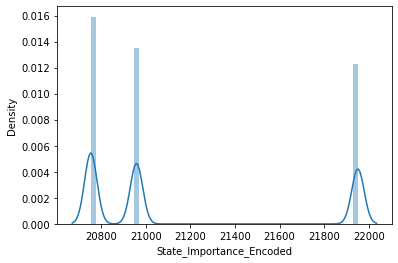

City_Importance_Encoded
2.1769716375059507


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


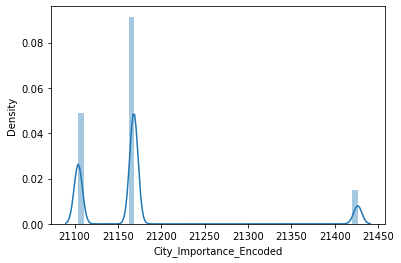

Old_or_New_Encoded
-2.9828147339237527


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


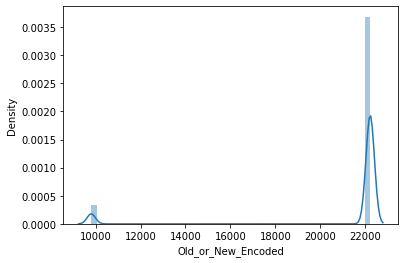

Car_Usage_level_Encoded
0.9847012089099019


C:\Users\AYUSH GUPTA\anaconda3-NEW\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


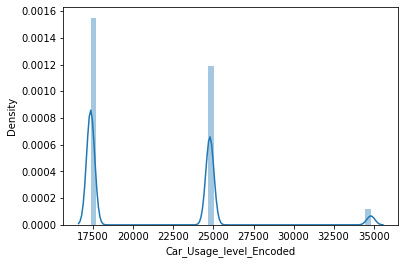

In [110]:
for col in DF:
    print(col)
    print(skew(DF[col]))
    
    
    plt.figure()
    sns.distplot(DF[col])
    plt.show()
    

A skewness value greater than 1 or less than -1 indicates a highly skewed distribution. 

A value between 0.5 and 1 or -0.5 and -1 is moderately skewed.

A value between -0.5 and 0.5 indicates that the distribution is fairly symmetrical.






**We can observe that except 'State_Encoded' column every column is highly skewed** 

But before we change the data into logNormal or Sqaureroot distribution we need to check the correlation b/wn the dependent and independent features.

As once changed into the logNormal distribution the correlation b/wn dependent and independent features values changes

Also we cannot change the Negative value of skewness into the LogNormal or Squareroot as it will give us the NaN value

In [111]:
#lET'S CHECK THE CORRELATION B/WN THE DEPENDENT AND INDEPENDENT FEATURES

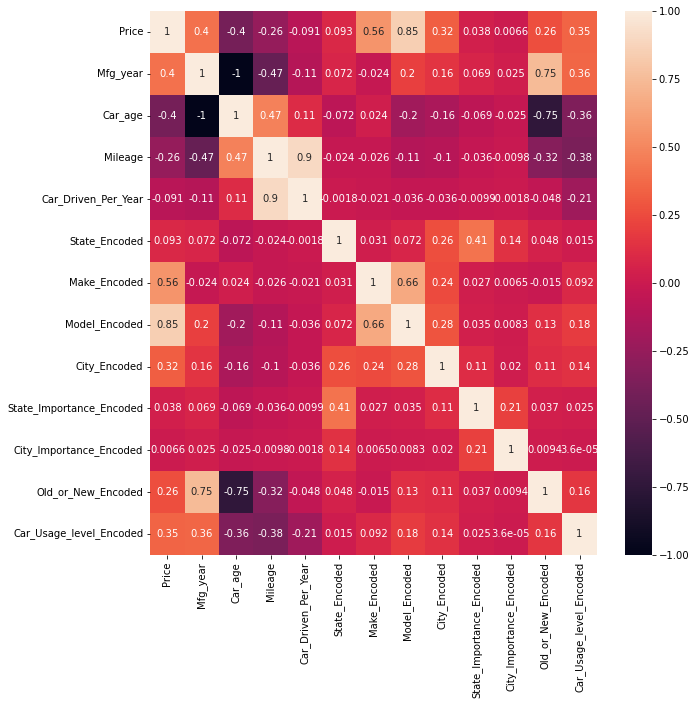

In [112]:
plt.figure(figsize=(10,10))
sns.heatmap(DF.corr(),annot=True)
plt.show()

**We can Observe the following from the above heatmap:**

we need to check the features(independent feature) vs Price(dependent feature).

**Higly correlated with Price( Cannot change )**
*  Model_Encoded 

**Moderately correlated with Price(Can be changed)**
* Mfg_year,
* Mileage,
* Car_age,
* Make_Encoded
* City_Encoded 
* Car_Driven_Per_Year
* State_Encoded
* State_Importance_Encoded
* City_Importance_Encoded
* Car_Usage_level_Encoded

**Least correlated with Price(Definitely should be changed but it's not skewed**
* State_Encoded 


we Cannot change the 'Year' feature into LogNormal Distribution as it will give us NaN values

In [113]:
np.log(-1) 

C:\Users\AYUSHG~1\AppData\Local\Temp/ipykernel_9704/116312727.py:1: RuntimeWarning: invalid value encountered in log
  np.log(-1)


nan

In [114]:
DF["Mileage"] = np.log(DF["Mileage"])

In [115]:
DF["City_Encoded"] = np.log(DF["City_Encoded"])

In [116]:
DF["Make_Encoded"] = np.log(DF["Make_Encoded"])

In [117]:
DF["City_Encoded"] = np.log(DF["City_Encoded"])

In [118]:
DF["Car_Driven_Per_Year"] = np.log(DF["Car_Driven_Per_Year"])

In [119]:
DF["State_Encoded"] = np.log(DF["State_Encoded"])

In [120]:
DF["State_Importance_Encoded"] = np.log(DF["State_Importance_Encoded"])

In [121]:
DF["City_Importance_Encoded"] = np.log(DF["City_Importance_Encoded"])

In [122]:
DF["Car_Usage_level_Encoded"] = np.log(DF["Car_Usage_level_Encoded"])

In [123]:
DF["Old_or_New_Encoded"] = np.log(DF["Old_or_New_Encoded"])

**TRANSFORMING COLUMNS INTO UPPER CASE**

In [124]:
DF.columns = DF.columns.str.upper()

## Dataset Now

In [125]:
DF.head()

,PRICE,MFG_YEAR,CAR_AGE,MILEAGE,CAR_DRIVEN_PER_YEAR,STATE_ENCODED,MAKE_ENCODED,MODEL_ENCODED,CITY_ENCODED,STATE_IMPORTANCE_ENCODED,CITY_IMPORTANCE_ENCODED,OLD_OR_NEW_ENCODED,CAR_USAGE_LEVEL_ENCODED
0,8995,2014,8,10.483606,8.404164,10.058539,10.051761,16240.052632,2.300572,9.996560,9.960262,10.008981,10.117699
1,10888,2013,9,9.883591,7.686366,10.005756,10.051761,17214.413636,2.298535,9.940469,9.960262,10.008981,10.117699
2,8995,2013,9,10.796530,8.599306,10.058539,10.051761,16240.052632,2.300572,9.996560,9.960262,10.008981,9.760701
3,10999,2014,8,10.594683,8.515241,9.954690,10.051761,17214.413636,2.302840,9.940469,9.957230,10.008981,10.117699
4,14799,2016,6,10.005232,8.213472,9.964482,10.051761,22464.898396,2.288573,9.950288,9.960262,10.008981,10.117699


## Saving our DataFrame to our device

In [126]:
DF.to_csv("C:/Users/AYUSH GUPTA/Data Science_1/Data science/Technocolab Project/DataFrame.csv", index = False)

In [133]:
Df = pd.read_csv('DataFrame.csv')

In [134]:
Df.head()

,PRICE,MFG_YEAR,CAR_AGE,MILEAGE,CAR_DRIVEN_PER_YEAR,STATE_ENCODED,MAKE_ENCODED,MODEL_ENCODED,CITY_ENCODED,STATE_IMPORTANCE_ENCODED,CITY_IMPORTANCE_ENCODED,OLD_OR_NEW_ENCODED,CAR_USAGE_LEVEL_ENCODED
0,8995,2014,8,10.483606,8.404164,10.058539,10.051761,16240.052632,2.300572,9.996560,9.960262,10.008981,10.117699
1,10888,2013,9,9.883591,7.686366,10.005756,10.051761,17214.413636,2.298535,9.940469,9.960262,10.008981,10.117699
2,8995,2013,9,10.796530,8.599306,10.058539,10.051761,16240.052632,2.300572,9.996560,9.960262,10.008981,9.760701
3,10999,2014,8,10.594683,8.515241,9.954690,10.051761,17214.413636,2.302840,9.940469,9.957230,10.008981,10.117699
4,14799,2016,6,10.005232,8.213472,9.964482,10.051761,22464.898396,2.288573,9.950288,9.960262,10.008981,10.117699


## Spliting the Dataset into Train and Test sub datasets

In [135]:
# Imorting Library
from sklearn.model_selection import train_test_split

In [136]:
# X is a varibale for all independent features
X= DF.drop(['PRICE'],axis=1)
print(X)

         MFG_YEAR  CAR_AGE    MILEAGE  CAR_DRIVEN_PER_YEAR  STATE_ENCODED  \
0            2014        8  10.483606             8.404164      10.058539   
1            2013        9   9.883591             7.686366      10.005756   
2            2013        9  10.796530             8.599306      10.058539   
3            2014        8  10.594683             8.515241       9.954690   
4            2016        6  10.005232             8.213472       9.964482   
...           ...      ...        ...                  ...            ...   
2068367      2017        5   3.218876             1.609438       9.971045   
2068368      2017        5   2.302585             0.693147       9.968618   
2068369      2018        4   7.824046             6.437752       9.971045   
2068370      2017        5   8.071219             6.461781       9.971045   
2068371      2017        5   9.029058             7.419620       9.968618   

         MAKE_ENCODED  MODEL_ENCODED  CITY_ENCODED  STATE_IMPORTANCE_ENCODE

In [137]:
# Y is a Varible for dependent feature 
Y = DF[['PRICE']]
print(Y)

         PRICE
0         8995
1        10888
2         8995
3        10999
4        14799
...        ...
2068367  79900
2068368  80895
2068369  68755
2068370  72260
2068371  60240

[2068372 rows x 1 columns]


In [138]:
#Splitting the Data into Training and Testing data
# Train and testing the data
x_train,x_test,y_train,y_test =train_test_split(X,Y,test_size=0.2,random_state=100)

# Test size is taken 20% of total Dataset , Whereas Train Size is 80% of total dataset

In [139]:
print(y_train)

         PRICE
1423379  16578
798201   31000
1023275  17900
1091813  23730
1767057  16700
...        ...
864087   19500
1826663   9900
210755   11408
1104664  22308
1873416  12800

[1654697 rows x 1 columns]


In [140]:
print(x_train)

         MFG_YEAR  CAR_AGE    MILEAGE  CAR_DRIVEN_PER_YEAR  STATE_ENCODED  \
1423379      2016        6  10.748067             8.956308       9.902518   
798201       2017        5   7.832808             6.223370       9.849374   
1023275      2014        8   9.579902             7.500460      10.058539   
1091813      2010       12  11.008960             8.524053       9.960614   
1767057      2015        7  10.479623             8.533713       9.827814   
...           ...      ...        ...                  ...            ...   
864087       2011       11  11.876137             9.478242      10.065320   
1826663      2006       16  11.513965             8.741376       9.734850   
210755       2013        9  10.615334             8.418109      10.044184   
1104664      2012       10  10.041727             7.739142       9.942053   
1873416      2014        8  10.435908             8.356467       9.911762   

         MAKE_ENCODED  MODEL_ENCODED  CITY_ENCODED  STATE_IMPORTANCE_ENCODE